# 피마 인디언 당뇨병 (Pima Indians Diabetes Dataset)
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import myutils as my

## 데이터 준비

In [3]:
# !gdown https://raw.githubusercontent.com/devdio/datasets/main/diabetes.csv

In [4]:
diabetes = pd.read_csv("diabetes.csv")

In [5]:
diabetes.shape

(768, 9)

In [6]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


인슐린이 0, 혈관 두께가 0 -> 결측치 대신 이상치임

실제로 분석할 때는 처리 해야 함 (지금은 안 할 거임)

In [8]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
diabetes['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

0이면 음성, 1이면 양성

## 이상치 확인
- 0이 있으면 안 될 것 같은 카테고리들 확인
- apply : 그룹으로 지정해서 확인

In [10]:
def iszero(x):
    return x==0

In [11]:
diabetes.apply(iszero)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,True,False,False,False,False
1,False,False,False,False,True,False,False,False,True
2,False,False,False,True,True,False,False,False,False
3,False,False,False,False,False,False,False,False,True
4,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,True
764,False,False,False,False,True,False,False,False,True
765,False,False,False,False,False,False,False,False,True
766,False,False,False,True,True,False,False,False,False


In [16]:
df.apply(iszero).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

이상치를 처리 -> mean, mid 등으로 채워넣기?

In [13]:
diabetes.loc[diabetes['Glucose']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [14]:
df = diabetes.copy()

In [15]:
df['Glucose'].replace(0, np.nan, inplace=True)

In [17]:
for col in ['BloodPressure', 'BMI','Insulin', 'SkinThickness']:
    df[col].replace(0, np.nan, inplace=True)

In [18]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [19]:
df['Glucose'].fillna(df['Glucose'].mean(), inplace=True)
df['BMI'].fillna(df['BMI'].mean(), inplace=True)
df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace=True)
df['Insulin'].fillna(df['Insulin'].mean(), inplace=True)
df['SkinThickness'].fillna(df['SkinThickness'].mean(), inplace=True)
# 평균 대신 중간값을 넣어도 ㅇㅋ

In [20]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [21]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

X_train.shape, X_test.shape

((614, 8), (154, 8))

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
y_train = y_train.values

In [27]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()
#lbfgs라는 알고리즘이 있음, 주로 l2를 많이 사용 (제곱으로 구하는 거), solver: 알고리즘의 종류 선택
#solver 효율, 점수 gridsearch로 한 번 알아보기

lg.fit(X_train, y_train)

LogisticRegression()

In [28]:
lg.score(X_train, y_train) # R2 값 = 1에 가까울 수록 좋은 값 (정확도는 아님)

0.762214983713355

## 테스트

In [29]:
y_test = y_test.values

In [30]:
y_pred = lg.predict(X_test)

In [33]:
y_pred = lg.predict_proba(X_test) #확률

In [42]:
y_pred = np.argmax(y_pred, axis=1) #함수 사용법 기억해두기

AxisError: axis 1 is out of bounds for array of dimension 1

In [39]:
my.print_score(y_test, y_pred)

accuracy: 0.7922077922077922
precision: 0.75
recall: 0.6111111111111112


mse는 회귀에서 사용되고, 여기는 분류이므로 mse, rmse를 테스트 지표로 삼으면 안됨!

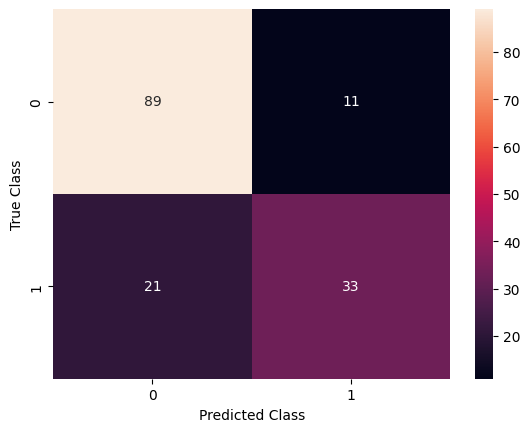

In [41]:
my.draw_cm(y_test, y_pred)

로지스틱 회귀는 확률을 가지고 평가할 수 있다는 게 다른 점

다른 알고리즘인 경우에는 사이킷런에서 내부적으로 계산해서 확률을 알려줄 수는 있음
